# Exploring time varying dynamics

## Importing the necessary modules

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np #numerical python used for working with arrays, mathematical operations
import xarray as xr #package for labeling and adding metadata to multi-dimensional arrays

import sys
usernm = "rmcgorty"
sys.path.append("C:/Users/%s/Documents/GitHub/PyDDM/PyDDM" % usernm) #must point to the PyDDM folder
### If you don't have PyDDM, get it here: https://github.com/rmcgorty/PyDDM
import ddm_analysis_and_fitting as ddm

import pickle #for saving data

## Example data -- 1 micron beads with stage moving at 7 microns/s

### Loading data and analysis parameters

In [3]:
import yaml
ddm_analysis_parameters_str = """
DataDirectory: './'
FileName: '1um_Beads_7ums.tif'
Metadata:
  pixel_size: 0.186 # size of pixel in um
  frame_rate: 45.4 #frames per second
Analysis_parameters:
  starting_frame_number: 0
  number_lag_times: 30
  last_lag_time: 600
  binning: yes
  bin_size: 2
  use_windowing_function: yes
  overlap_method: 1
  number_differences_max: 150
Fitting_parameters:
  model: 'DDM Matrix - Single Exponential'
  Tau: [1.0, 0.001, 10]
  StretchingExp: [1.0, 0.5, 3.1]
  Amplitude: [1e2, 1, 1e6]
  Background: [2.5e4, 0, 1e7]
  Good_q_range: [5, 20]
  Auto_update_good_q_range: True
"""
parameters_as_dictionary = yaml.safe_load(ddm_analysis_parameters_str)
ddm_calc = ddm.DDM_Analysis(parameters_as_dictionary)

Provided metadata: {'pixel_size': 0.186, 'frame_rate': 45.4}
Image shape: 2000-by-128-by-128
Number of frames to use for analysis: 2000
Maximum lag time (in frames): 600
Number of lag times to compute DDM matrix: 30
Using the full frame, dimensions: 128-by-128.
Applying windowing function...
Applying binning...
Dimensions after binning (2000, 64, 64), the new pixel size 0.372


### Calculating the DDM matrix

2022-06-12 12:30:17,028 - DDM Calculations - Running dt = 1...
2022-06-12 12:30:17,644 - DDM Calculations - Running dt = 5...
2022-06-12 12:30:18,237 - DDM Calculations - Running dt = 11...
2022-06-12 12:30:18,861 - DDM Calculations - Running dt = 24...
2022-06-12 12:30:19,486 - DDM Calculations - Running dt = 51...
2022-06-12 12:30:20,088 - DDM Calculations - Running dt = 110...
2022-06-12 12:30:20,669 - DDM Calculations - Running dt = 234...
2022-06-12 12:30:21,239 - DDM Calculations - Running dt = 497...


DDM matrix took 4.472196340560913 seconds to compute.
 Background estimate ± std is 2.06 ± 0.12


<xarray.Dataset>
Dimensions:           (lagtime: 30, q_y: 64, q_x: 64, q: 32, y: 64, x: 64, frames: 30)
Coordinates:
  * lagtime           (lagtime) float64 0.02203 0.04405 0.06608 ... 10.95 13.19
    framelag          (frames) int32 1 2 3 4 5 6 7 ... 234 282 341 411 497 599
  * q_y               (q_y) float64 -8.445 -8.181 -7.917 ... 7.653 7.917 8.181
  * q_x               (q_x) float64 -8.445 -8.181 -7.917 ... 7.653 7.917 8.181
  * q                 (q) float64 0.0 0.2639 0.5278 0.7917 ... 7.653 7.917 8.181
  * y                 (y) int32 0 1 2 3 4 5 6 7 8 ... 55 56 57 58 59 60 61 62 63
  * x                 (x) int32 0 1 2 3 4 5 6 7 8 ... 55 56 57 58 59 60 61 62 63
Dimensions without coordinates: frames
Data variables:
    ddm_matrix_full   (lagtime, q_y, q_x) float64 0.4972 0.526 ... 0.5529 0.5726
    ddm_matrix        (lagtime, q) float64 0.0 11.94 16.09 ... 1.934 1.776 1.671
    first_image       (y, x) float64 1.185e-06 4.338e-06 ... 4.028e-06 1.056e-06
    alignment_factor  (lagtime, q) float64 nan 6.123e-17 ... -0.132 -0.1375
    avg_image_ft      (q) float64 0.0 5.491e+05 5.108e+04 ... 1.108 1.026 0.9565
    num_pairs_per_dt  (lagtime) int32 286 286 286 286 285 ... 277 265 251 281
    B                 float64 2.06
    B_std             float64 0.1239
    Amplitude         (q) float64 -2.06 1.098e+06 1.021e+05 ... -0.0087 -0.1472
    ISF               (lagtime, q) float64 0.0 1.0 0.9999 ... -31.62 -1.647
Attributes: (12/21)
    units:                   Intensity
    lagtime:                 sec
    q:                       μm$^{-1}$
    x:                       pixels
    y:                       pixels
    info:                    ddm_matrix is the averages of FFT difference ima...
    ...                      ...
    last_lag_time:           600
    binning:                 True
    bin_size:                2
    use_windowing_function:  True
    overlap_method:          1
    number_differences_max:  150

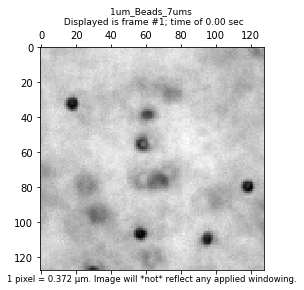

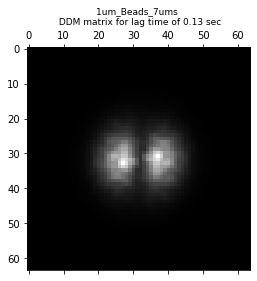

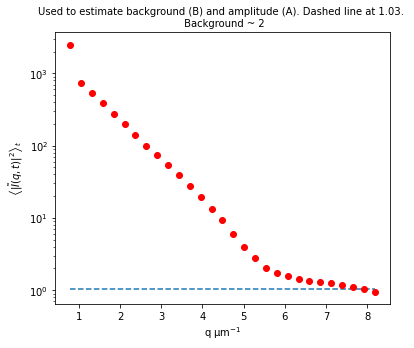

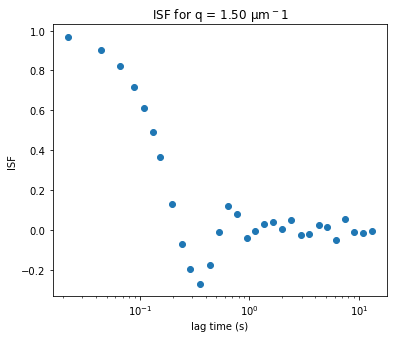

In [4]:
ddm_calc.calculate_DDM_matrix()

### Fitting the DDM matrix

In [5]:
ddm.print_fitting_models()

1: 'DDM Matrix - Single Exponential'
2: 'DDM Matrix - Double Exponential'
3: 'DDM Matrix - Exponential and Ballistic'
4: 'DDM Matrix - Ballistic'
5: 'DDM Matrix - Double Ballistic'
6: 'DDM Matrix - Single Exponential - NonErgodic'
7: 'DDM Matrix - Polydisperse'
8: 'ISF - Single Exponential'
9: 'ISF - Double Exponential'
10: 'ISF - Exponential and Ballistic'
11: 'ISF - Ballistic'
12: 'ISF - Double Ballistic'
13: 'ISF - Single Exponential - NonErgodic'


,Initial guess,Minimum,Maximum
Amplitude,100.0,1.000,1000000.0
Tau,1.0,0.001,10.0
Background,25000.0,0.000,10000000.0
StretchingExp,1.0,0.500,3.1


Loading file ./1um_Beads_7ums_ddmmatrix.nc ...
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit01'.
In function 'get_tau_vs_q_fit', using new tau...
In hf.plot_one_tau_vs_q function, using new tau... 


<xarray.Dataset>
Dimensions:          (parameter: 4, q: 32, lagtime: 30)
Coordinates:
  * parameter        (parameter) <U13 'Amplitude' 'Tau' ... 'StretchingExp'
  * q                (q) float64 0.0 0.2639 0.5278 0.7917 ... 7.653 7.917 8.181
  * lagtime          (lagtime) float64 0.02203 0.04405 0.06608 ... 10.95 13.19
Data variables:
    parameters       (parameter, q) float64 1.0 5.068e+03 3.501e+03 ... 0.5 0.5
    theory           (lagtime, q) float64 6.032e-09 41.95 100.0 ... 2.286 2.161
    isf_data         (lagtime, q) float64 0.0 1.0 0.9999 ... 1.811 -31.62 -1.647
    ddm_matrix_data  (lagtime, q) float64 0.0 11.94 16.09 ... 1.934 1.776 1.671
    A                (q) float64 -2.06 1.098e+06 1.021e+05 ... -0.0087 -0.1472
    B                float64 2.06
Attributes: (12/18)
    model:                          DDM Matrix - Single Exponential
    data_to_use:                    DDM Matrix
    initial_params_dict:            ["{'n': 0, 'value': 100.0, 'limits': [1.0...
    effective_diffusion_coeff:      4.396838630522887
    tau_vs_q_slope:                 [-1.12363861]
    msd_alpha:                      [1.77993172]
    ...                             ...
    DataDirectory:                  ./
    FileName:                       1um_Beads_7ums.tif
    pixel_size:                     0.186
    frame_rate:                     45.4
    BackgroundMethod:               0
    OverlapMethod:                  1

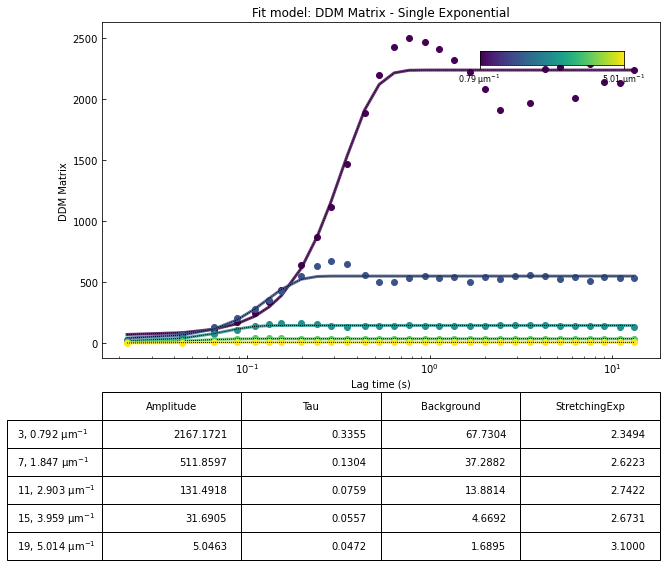

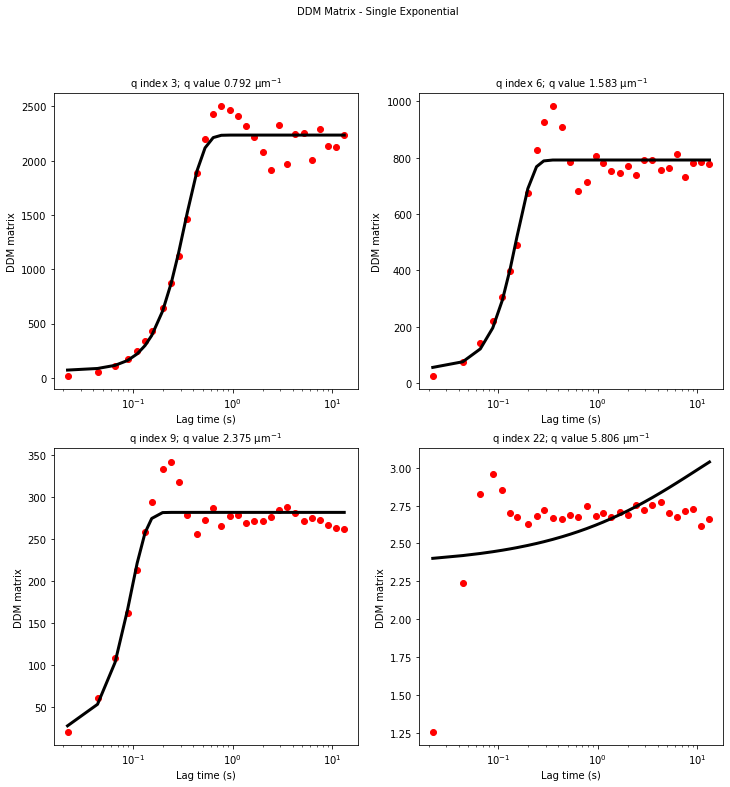

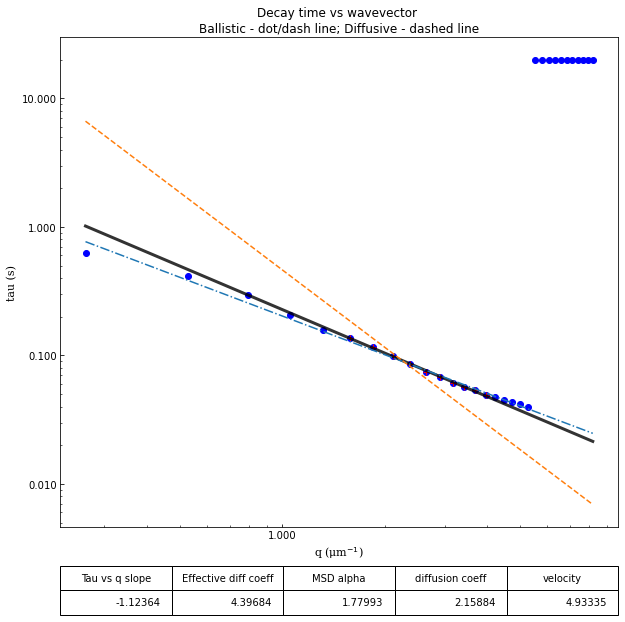

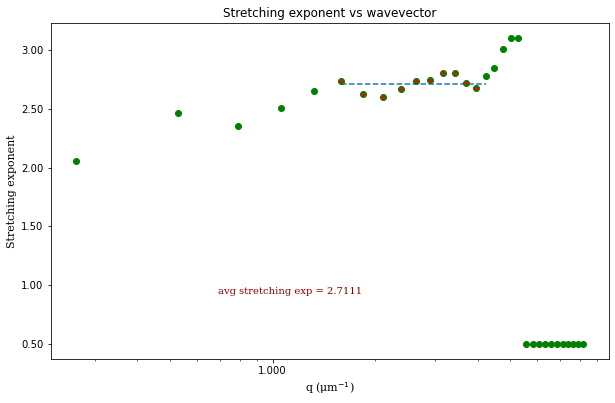

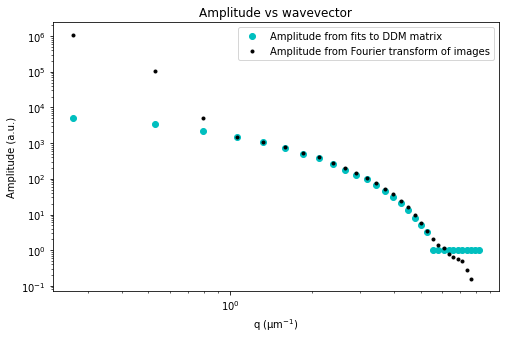

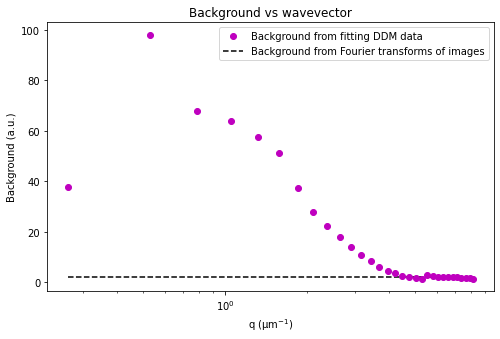

In [6]:
ddm_fit = ddm.DDM_Fit(parameters_as_dictionary)
fit01 = ddm_fit.fit(name_fit = 'fit01', display_table=False)
ddm.fit_report(fit01, q_indices=[3,6,9,22], forced_qs=[6,16], use_new_tau=True, show=True)

### Inspecting fits

<IPython.core.display.Javascript object>


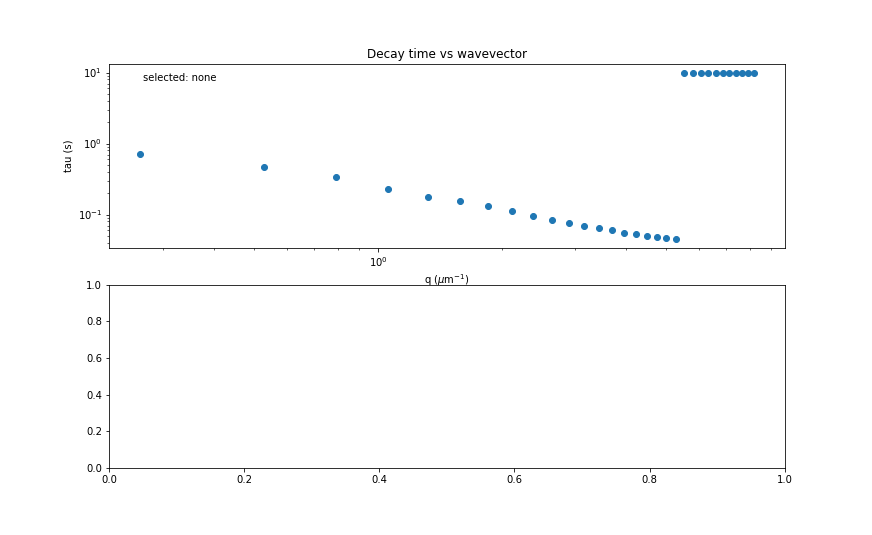

Click on a point in the tau vs q plot to see a fit.
Or press 'N' or 'P' to display next or previous fit.


Text(0, 0.5, 'tau (s)')

In [7]:
%matplotlib notebook
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(10,10/1.618))
browser = ddm.Browse_DDM_Fits(fig, ax, ax2, fit01)

fig.canvas.mpl_connect('pick_event', browser.on_pick)
fig.canvas.mpl_connect('key_press_event', browser.on_press)

ax.set_title('Decay time vs wavevector')
ax.set_xlabel("q ($\mu$m$^{-1}$)")
ax.set_ylabel("tau (s)")

In [8]:
%matplotlib inline

### Trying a different model

In [9]:
ddm_fit.reload_fit_model_by_name("DDM Matrix - Ballistic")

Need to specify SchulzNum.


,Initial guess,Minimum,Maximum
Amplitude,100.0,1.000,1000000.0
Background,25000.0,0.000,10000000.0
Tau,1.0,0.001,10.0
SchulzNum,0.0,0.000,0.0


In [10]:
ddm_fit.set_parameter_initial_guess("SchulzNum", 1e5)
ddm_fit.set_parameter_bounds("SchulzNum", [1e1,1e9])

Parameter 'SchulzNum' set to 100000.0.
Parameter 'SchulzNum' lower limit set to 10.0.
Parameter 'SchulzNum' upper limit set to 1000000000.0.


Fit is saved in fittings dictionary with key 'fit02'.


<xarray.Dataset>
Dimensions:          (parameter: 4, q: 32, lagtime: 30)
Coordinates:
  * parameter        (parameter) <U10 'Amplitude' 'Background' 'Tau' 'SchulzNum'
  * q                (q) float64 0.0 0.2639 0.5278 0.7917 ... 7.653 7.917 8.181
  * lagtime          (lagtime) float64 0.02203 0.04405 0.06608 ... 10.95 13.19
Data variables:
    parameters       (parameter, q) float64 1.0 4.753e+03 ... 3.491e+07
    theory           (lagtime, q) float64 8.086e-07 90.86 147.6 ... 2.135 2.009
    isf_data         (lagtime, q) float64 0.0 1.0 0.9999 ... 1.811 -31.62 -1.647
    ddm_matrix_data  (lagtime, q) float64 0.0 11.94 16.09 ... 1.934 1.776 1.671
    A                (q) float64 -2.06 1.098e+06 1.021e+05 ... -0.0087 -0.1472
    B                float64 2.06
Attributes: (12/18)
    model:                          DDM Matrix - Ballistic
    data_to_use:                    DDM Matrix
    initial_params_dict:            ["{'n': 0, 'value': 100.0, 'limits': [1.0...
    effective_diffusion_coeff:      8.145660145632856
    tau_vs_q_slope:                 [-1.06049371]
    msd_alpha:                      [1.88591406]
    ...                             ...
    DataDirectory:                  ./
    FileName:                       1um_Beads_7ums.tif
    pixel_size:                     0.186
    frame_rate:                     45.4
    BackgroundMethod:               0
    OverlapMethod:                  1

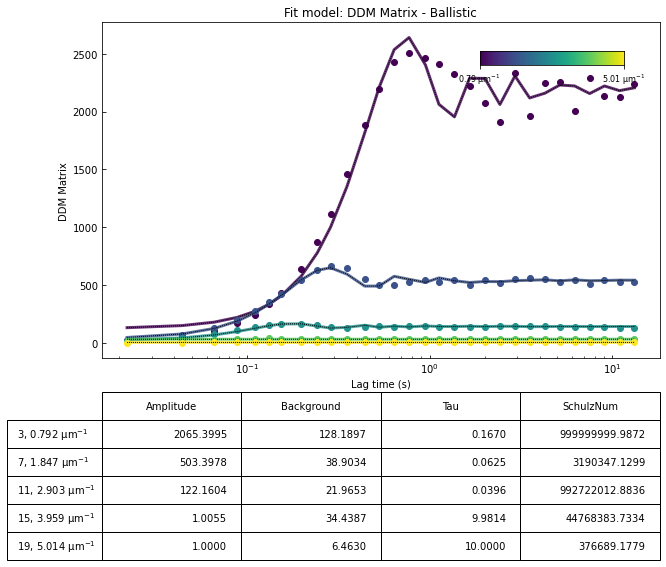

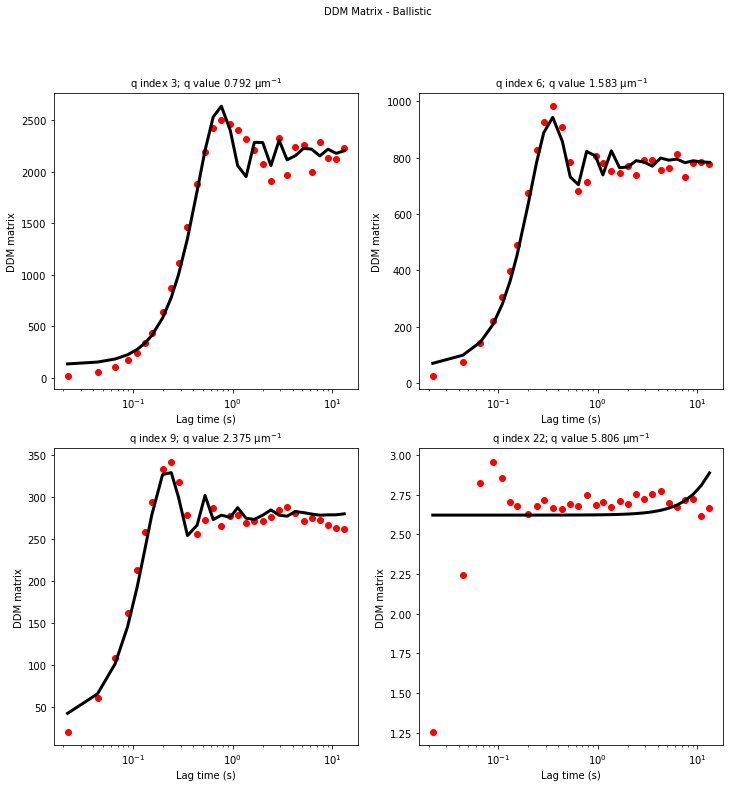

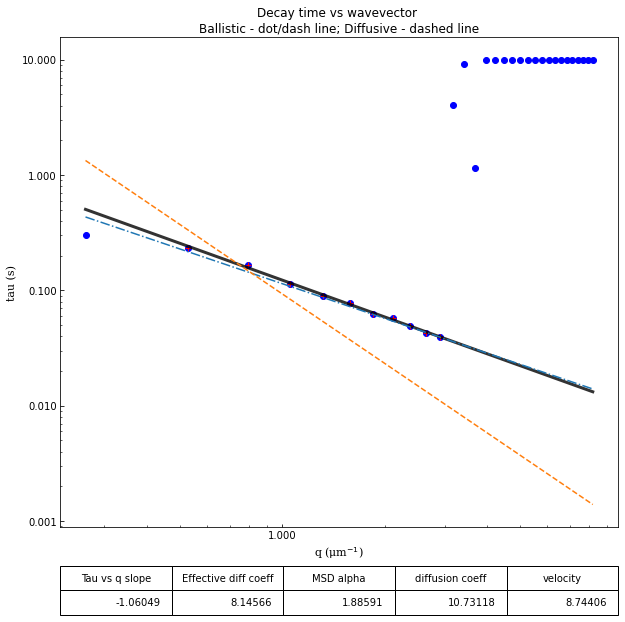

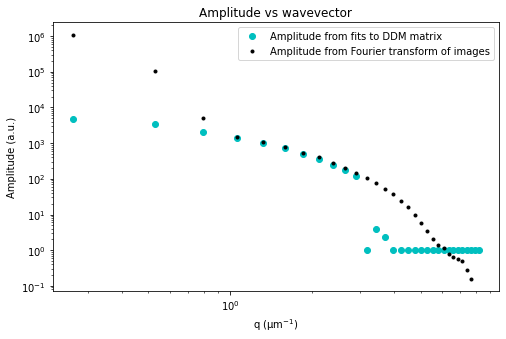

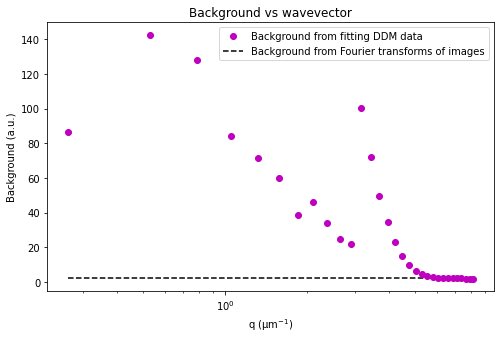

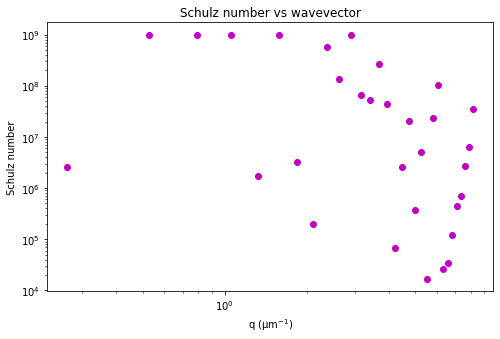

In [11]:
fit02 = ddm_fit.fit(name_fit = 'fit02', display_table=False)
ddm.fit_report(fit02, q_indices=[3,6,9,22], forced_qs=[2,12], use_new_tau=True, show=True)

### Inspecting this fit

<IPython.core.display.Javascript object>


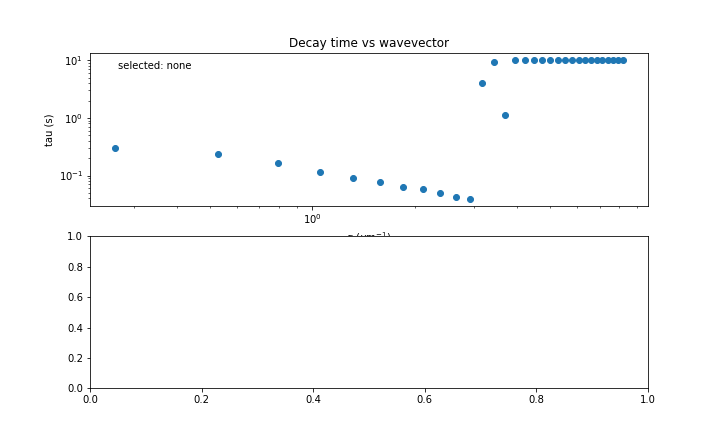

Click on a point in the tau vs q plot to see a fit.
Or press 'N' or 'P' to display next or previous fit.


Text(0, 0.5, 'tau (s)')

In [14]:
%matplotlib notebook
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(10,10/1.618))
browser = ddm.Browse_DDM_Fits(fig, ax, ax2, fit02)

fig.canvas.mpl_connect('pick_event', browser.on_pick)
fig.canvas.mpl_connect('key_press_event', browser.on_press)

ax.set_title('Decay time vs wavevector')
ax.set_xlabel("q ($\mu$m$^{-1}$)")
ax.set_ylabel("tau (s)")


### Showing all fits

In [15]:
for fit_I_did in ddm_fit.fittings:
    print(fit_I_did)
    display(ddm_fit.fittings[fit_I_did]['fit'])

fit01


<xarray.Dataset>
Dimensions:          (parameter: 4, q: 32, lagtime: 30)
Coordinates:
  * parameter        (parameter) <U13 'Amplitude' 'Tau' ... 'StretchingExp'
  * q                (q) float64 0.0 0.2639 0.5278 0.7917 ... 7.653 7.917 8.181
  * lagtime          (lagtime) float64 0.02203 0.04405 0.06608 ... 10.95 13.19
Data variables:
    parameters       (parameter, q) float64 1.0 5.068e+03 3.501e+03 ... 0.5 0.5
    theory           (lagtime, q) float64 6.032e-09 41.95 100.0 ... 2.286 2.161
    isf_data         (lagtime, q) float64 0.0 1.0 0.9999 ... 1.811 -31.62 -1.647
    ddm_matrix_data  (lagtime, q) float64 0.0 11.94 16.09 ... 1.934 1.776 1.671
    A                (q) float64 -2.06 1.098e+06 1.021e+05 ... -0.0087 -0.1472
    B                float64 2.06
Attributes: (12/18)
    model:                          DDM Matrix - Single Exponential
    data_to_use:                    DDM Matrix
    initial_params_dict:            ["{'n': 0, 'value': 100.0, 'limits': [1.0...
    effective_diffusion_coeff:      4.396838630522887
    tau_vs_q_slope:                 [-1.12363861]
    msd_alpha:                      [1.77993172]
    ...                             ...
    DataDirectory:                  ./
    FileName:                       1um_Beads_7ums.tif
    pixel_size:                     0.186
    frame_rate:                     45.4
    BackgroundMethod:               0
    OverlapMethod:                  1

fit02


<xarray.Dataset>
Dimensions:          (parameter: 4, q: 32, lagtime: 30)
Coordinates:
  * parameter        (parameter) <U10 'Amplitude' 'Background' 'Tau' 'SchulzNum'
  * q                (q) float64 0.0 0.2639 0.5278 0.7917 ... 7.653 7.917 8.181
  * lagtime          (lagtime) float64 0.02203 0.04405 0.06608 ... 10.95 13.19
Data variables:
    parameters       (parameter, q) float64 1.0 4.753e+03 ... 3.491e+07
    theory           (lagtime, q) float64 8.086e-07 90.86 147.6 ... 2.135 2.009
    isf_data         (lagtime, q) float64 0.0 1.0 0.9999 ... 1.811 -31.62 -1.647
    ddm_matrix_data  (lagtime, q) float64 0.0 11.94 16.09 ... 1.934 1.776 1.671
    A                (q) float64 -2.06 1.098e+06 1.021e+05 ... -0.0087 -0.1472
    B                float64 2.06
Attributes: (12/18)
    model:                          DDM Matrix - Ballistic
    data_to_use:                    DDM Matrix
    initial_params_dict:            ["{'n': 0, 'value': 100.0, 'limits': [1.0...
    effective_diffusion_coeff:      8.145660145632856
    tau_vs_q_slope:                 [-1.06049371]
    msd_alpha:                      [1.88591406]
    ...                             ...
    DataDirectory:                  ./
    FileName:                       1um_Beads_7ums.tif
    pixel_size:                     0.186
    frame_rate:                     45.4
    BackgroundMethod:               0
    OverlapMethod:                  1

# Using phiDM to get $v_x(t)$ and $v_y(t)$

In [16]:
dt = 1 #lag time (in frames)
sz = 4 #size of the region of the matrix of phases over which to fit a plane
phiDM = ddm_calc.phiDM(dt, sz, use_gf=True, gfsize=3, err_limit=2e-5)

phiDM.to_netcdf("phiDM_%s_dt%i_size%i.nc" % (ddm_calc.filename_for_saving_data, dt,sz)) #save to disk

<IPython.core.display.Javascript object>


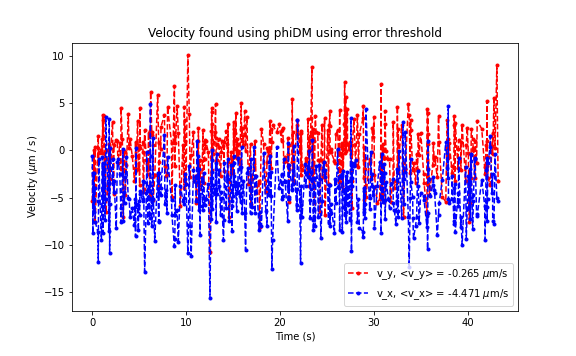

With error threshold, magntiude of v = 4.479
Vx +/- stderr = -4.471 +/- 0.143
Vy +/- stderr = -0.265 +/- 0.141
Vx std deviation = 3.032
Vy std deviation = 2.981
Skew vx: 0.017
Skew vy: 0.006
median Vx +/- stderr = -4.509 +/- 0.143
median Vy +/- stderr = -0.176 +/- 0.141


<IPython.core.display.Javascript object>


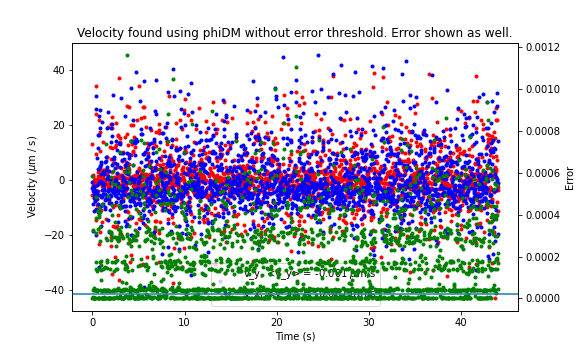

<IPython.core.display.Javascript object>


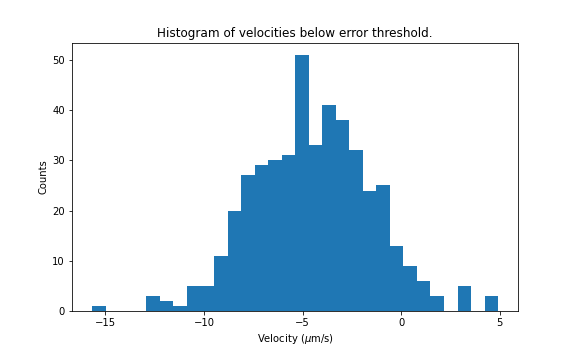

Text(0, 0.5, 'Counts')

In [17]:
fig,ax = plt.subplots(figsize=(8,8/1.618))

#Locate where the error is less than some limit
w = np.where(phiDM.error < phiDM.err_limit)

ax.plot(phiDM.vtime[w], phiDM.vy[w], '--r.', label='v_y, <v_y> = %.3f $\mu$m/s' % np.mean(phiDM.vy[w]))
ax.plot(phiDM.vtime[w], phiDM.vx[w], '--b.', label='v_x, <v_x> = %.3f $\mu$m/s' % np.mean(phiDM.vx[w]))
ax.set_xlabel("Time (s)")
ax.set_ylabel("Velocity ($\mu$m / s)")
plt.legend(loc=0)
ax.set_title("Velocity found using phiDM using error threshold")
print("With error threshold, magntiude of v = %.3f" % np.sqrt(np.mean(phiDM.vy[w])**2 + np.mean(phiDM.vx[w])**2))
print("Vx +/- stderr = %.3f +/- %.3f" % (np.mean(phiDM.vx[w]),np.std(phiDM.vx[w])/np.sqrt(len(w[0]))))
print("Vy +/- stderr = %.3f +/- %.3f" % (np.mean(phiDM.vy[w]),np.std(phiDM.vy[w])/np.sqrt(len(w[0]))))
print("Vx std deviation = %.3f" % np.std(phiDM.vx[w]))
print("Vy std deviation = %.3f" % np.std(phiDM.vy[w]))

skew_vx = np.mean(((phiDM.vx[w] - phiDM.vx[w].mean())**3)/ phiDM.vx[w].std()**3)
print("Skew vx: %.3f" % skew_vx)
skew_vy = np.mean(((phiDM.vy[w] - phiDM.vy[w].mean())**3)/ phiDM.vy[w].std()**3)
print("Skew vy: %.3f" % skew_vy)

print("median Vx +/- stderr = %.3f +/- %.3f" % (np.median(phiDM.vx[w]),np.std(phiDM.vx[w])/np.sqrt(len(w[0]))))
print("median Vy +/- stderr = %.3f +/- %.3f" % (np.median(phiDM.vy[w]),np.std(phiDM.vy[w])/np.sqrt(len(w[0]))))

fig,ax = plt.subplots(figsize=(8,8/1.618))
ax.set_title("Velocity found using phiDM without error threshold. Error shown as well.")
ax2 = ax.twinx()
w = np.where(phiDM.error < phiDM.err_limit)
ax.plot(phiDM.vtime, phiDM.vy, 'r.', label='v_y, <v_y> = %.3f $\mu$m/s' % np.mean(phiDM.vy))
ax.plot(phiDM.vtime, phiDM.vx, 'b.', label='v_x, <v_x> = %.3f $\mu$m/s' % np.mean(phiDM.vx))
ax.set_xlabel("Time (s)")
ax.set_ylabel("Velocity ($\mu$m / s)")
ax2.plot(phiDM.vtime, phiDM.error,'g.')
ax2.axhline(y=phiDM.err_limit)
ax2.set_ylabel("Error")
ax.legend(loc=0)

fig,ax = plt.subplots(figsize=(8,8/1.618))
w = np.where(phiDM.error < phiDM.err_limit)
ax.set_title("Histogram of velocities below error threshold.")
ax.hist(phiDM.vx[w], bins=30)
ax.set_xlabel("Velocity ($\mu$m/s)")
ax.set_ylabel("Counts")

## Can we correct for this drift and just get Brownian motion?

In [ ]:
ddm_calc.calculate_DDM_matrix(velocity=[6.0,0])

In [ ]:
ddm_fit = ddm.DDM_Fit(parameters_as_dictionary)
fit03 = ddm_fit.fit(name_fit = 'fit03', display_table=False)
ddm.fit_report(fit03, q_indices=[3,6,9,22], forced_qs=[6,16], use_new_tau=True, show=True)

In [ ]:
%matplotlib notebook
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(10,10/1.618))
browser = ddm.Browse_DDM_Fits(fig, ax, ax2, fit03)

fig.canvas.mpl_connect('pick_event', browser.on_pick)
fig.canvas.mpl_connect('key_press_event', browser.on_press)

ax.set_title('Decay time vs wavevector')
ax.set_xlabel("q")
ax.set_ylabel("tau (s)")